In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM
%matplotlib inline
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
max_features = 10_000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.6387 - acc: 0.6179 - val_loss: 0.5379 - val_acc: 0.7452
Epoch 2/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.4182 - acc: 0.8188 - val_loss: 0.4787 - val_acc: 0.7804
Epoch 3/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.3080 - acc: 0.8789 - val_loss: 0.3546 - val_acc: 0.8620
Epoch 4/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.2569 - acc: 0.8956 - val_loss: 0.3430 - val_acc: 0.8644
Epoch 5/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.1823 - acc: 0.9331 - val_loss: 0.3787 - val_acc: 0.8670
Epoch 6/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.1290 - acc: 0.9548 - val_loss: 0.5461 - val_acc: 0.7568
Epoch 7/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.0892 - acc: 0.9709 - val_loss: 0.4215 - val_acc:

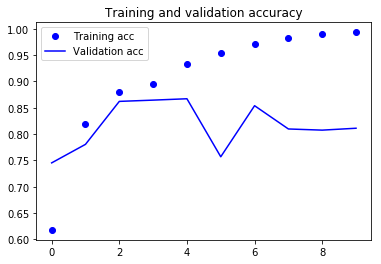

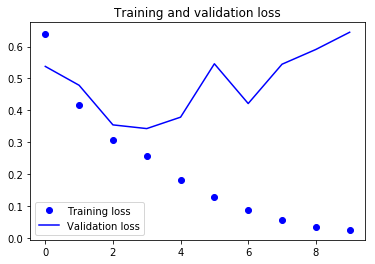

In [4]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 106s 5ms/step - loss: 0.5085 - acc: 0.7632 - val_loss: 0.3498 - val_acc: 0.8574
Epoch 2/10
20000/20000 [==============================] - 104s 5ms/step - loss: 0.2891 - acc: 0.8867 - val_loss: 0.3313 - val_acc: 0.8538
Epoch 3/10
20000/20000 [==============================] - 105s 5ms/step - loss: 0.2339 - acc: 0.9108 - val_loss: 0.3490 - val_acc: 0.8788
Epoch 4/10
20000/20000 [==============================] - 105s 5ms/step - loss: 0.1957 - acc: 0.9260 - val_loss: 0.5518 - val_acc: 0.8352
Epoch 5/10
20000/20000 [==============================] - 101s 5ms/step - loss: 0.1725 - acc: 0.9371 - val_loss: 0.3480 - val_acc: 0.8782
Epoch 6/10
20000/20000 [==============================] - 105s 5ms/step - loss: 0.1546 - acc: 0.9448 - val_loss: 0.3790 - val_acc: 0.8766
Epoch 7/10
20000/20000 [==============================] - 114s 6ms/step - loss: 0.1420 - acc: 0.9498 - val_loss: 0.3609 - v

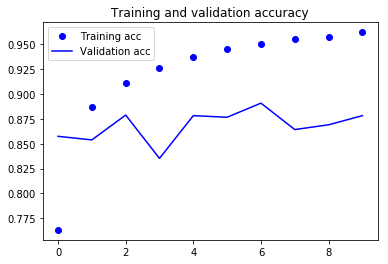

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()